In [39]:
#add comments
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('loan.csv')

In [41]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [43]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [44]:
df.shape

(39717, 111)

In [45]:
#identify null and non null attriutes
list_NA =[]
for i in df.columns:
    if df[i].isnull().sum() == 39717:
        list_NA.append(i)

print(list_NA)


['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_

In [47]:
#drop these Not Available columns, as the entire column is not available for all the rows and hence no use in eda.
for i in list_NA:
    df.drop([i], axis =1,inplace=True)
print(df.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN             May-16   
1   15.27%        59.83     C        C4  ...          NaN             Sep-13   
2   15.96%        84.33     C        C5  ...          NaN             May-16   
3   13.49%       339.31     C        C1  ...          NaN             Apr-16   
4   12.69%        67.79     B        B5  ...       Jun-16             May-16   

  collections_12_mths_ex_med  policy_code applicat

In [58]:
# find the % of null values in each columns

round(100*(df.isnull().sum()/len(df)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

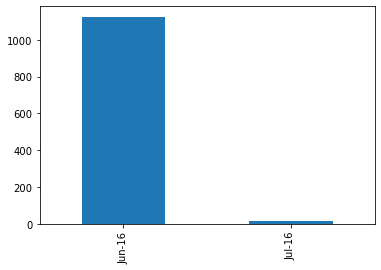

In [69]:
df.next_pymnt_d.value_counts().plot.bar()
plt.show()

In [75]:
100*(df.next_pymnt_d.value_counts()/len(df))

Jun-16    2.832540
Jul-16    0.037767
Name: next_pymnt_d, dtype: float64

In [60]:
df.shape

(39717, 57)

In [77]:
#Drop "next_pymnt_d" column as ~97% of its values is NULL.
df.drop(['next_pymnt_d'],axis=1, inplace=True)
print(df.shape)

(39717, 56)


In [78]:
100*(df.mths_since_last_record.value_counts()/len(df))

0.0      1.686935
104.0    0.153587
89.0     0.151069
113.0    0.148551
111.0    0.143515
           ...   
14.0     0.002518
6.0      0.002518
120.0    0.002518
5.0      0.002518
129.0    0.002518
Name: mths_since_last_record, Length: 111, dtype: float64

In [80]:
#Drop "mths_since_last_record" column as ~97% of its values is NULL.
df.drop(['mths_since_last_record'],axis=1, inplace=True)
print(df.shape)

(39717, 55)


In [84]:
list_cust_behaviour_variables = pd.read_csv('Loan behaviour variables.csv')
print(list_cust_behaviour_variables.columns)

Index(['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'application_type'],
      dtype='object')


In [85]:
#drop these customer behaviour variables as these columns would be applicable only after the loan is approved. 
#These variables cant be used by Lending Club agent for new applcants
print(df.shape)
for i in list_cust_behaviour_variables.columns:
    df.drop([i], axis =1,inplace=True)
print(df.shape)

(39717, 55)
(39717, 34)


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [88]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [99]:
#drop the rows which has "Current" loan status, as the anlaysis on these rows will not applicable to identify 
#if the new applicant will be charged-off or not.

df = df[df.loan_status != 'Current']

In [101]:
df.shape

(38577, 34)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

# 1.1. Data overview

In [103]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  38577
Columns  :  34

Features : 
 ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'mths_since_last_delinq', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']

Missing values :   41710

Unique values :  
 id                            38577
member_id                     38577
loan_amnt                       870
funded_amnt                    1019
funded_amnt_inv                8050
term                              2
int_rate                        370
installment                   15022
grade                             7
sub_grade                        35
emp_title                     28027
emp_l

In [104]:
df.policy_code.value_counts()

1    38577
Name: policy_code, dtype: int64

In [105]:
df.collections_12_mths_ex_med.value_counts()

0.0    38521
Name: collections_12_mths_ex_med, dtype: int64

In [110]:
 df['tax_liens'].nunique()

1

In [112]:
#identify nonly 1 value'attriutes
list_only_one_value =[]
for i in df.columns:
    if df[i].nunique() == 1:
        list_only_one_value.append(i)

print(list_only_one_value)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [113]:
print(df.shape)
for i in list_only_one_value:
    df.drop([i],axis =1, inplace = True)
    
print(df.shape)

(38577, 34)
(38577, 26)


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38577 non-null  int64  
 1   member_id               38577 non-null  int64  
 2   loan_amnt               38577 non-null  int64  
 3   funded_amnt             38577 non-null  int64  
 4   funded_amnt_inv         38577 non-null  float64
 5   term                    38577 non-null  object 
 6   int_rate                38577 non-null  object 
 7   installment             38577 non-null  float64
 8   grade                   38577 non-null  object 
 9   sub_grade               38577 non-null  object 
 10  emp_title               36191 non-null  object 
 11  emp_length              37544 non-null  object 
 12  home_ownership          38577 non-null  object 
 13  annual_inc              38577 non-null  float64
 14  verification_status     38577 non-null

In [114]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  38577
Columns  :  26

Features : 
 ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'mths_since_last_delinq', 'pub_rec_bankruptcies']

Missing values :   41559

Unique values :  
 id                        38577
member_id                 38577
loan_amnt                   870
funded_amnt                1019
funded_amnt_inv            8050
term                          2
int_rate                    370
installment               15022
grade                         7
sub_grade                    35
emp_title                 28027
emp_length                   11
home_ownership                5
annual_inc                 5215
verification_status           3
issue_d                      55
loan_status                   2
url          

# ignore - title ,url,desc, [after checking the univariate analysis]
#- needs data cleansing 
#emp_length - -Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.  
#home_ownership- The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.  ->> NONE - 3 records - if needed NONE to be imputed with Mode , explain why that metric choosen
#issue_d - The month which the loan was funded

# Standardize

issue_d - month and years
loan_status -0, 1 --
term 
int_rate remove % and convert to float
emp_length - 0, 1


# impute -
NA as 0 in pub_rec_bankruptcies

# not treated/analysed -
emp_title - too many values 
zip_code - can be analysed along with Addres_state



In [137]:

import datetime
from datetime import datetime
#s = "2016-03"
#f = "%Y-%m"
s = "aug-11"
f = "%b-%y"

out = datetime.strptime(s, f)
print(out)

2011-08-01 00:00:00


In [150]:
from datetime import datetime
df.issue_d = df.issue_d.apply(lambda x:datetime.strptime(x, '%b-%y'))

In [153]:
#derive issue_d into issue_d_month and issue_d_year 
df['issue_d_year'], df['issue_d_month'] = df['issue_d'].dt.year, df['issue_d'].dt.month


In [156]:
df.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,pub_rec_bankruptcies,issue_d_year,issue_d_month
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,NaN,0.0,2011,12


In [168]:
# standardizing term 
df["term_mon"] = df.term.apply(lambda x : int(x[1:3]))

In [183]:
#Standardize int_rate- remove %
df.int_rate = df.int_rate.apply(lambda x : float(x.replace('%','')))

In [184]:
#standardizing employee length
df["emp_length_std_derived"] = df.emp_length.apply(lambda x : 0 if x=='< 1 year' else(1 if x=='10+ years' else 2))

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      38577 non-null  int64         
 1   member_id               38577 non-null  int64         
 2   loan_amnt               38577 non-null  int64         
 3   funded_amnt             38577 non-null  int64         
 4   funded_amnt_inv         38577 non-null  float64       
 5   term                    38577 non-null  object        
 6   int_rate                38577 non-null  float64       
 7   installment             38577 non-null  float64       
 8   grade                   38577 non-null  object        
 9   sub_grade               38577 non-null  object        
 10  emp_title               36191 non-null  object        
 11  emp_length              37544 non-null  object        
 12  home_ownership          38577 non-null  object

In [199]:
cat_cols = ['term','grade','sub_grade','emp_length','emp_length_std_derived','home_ownership','verification_status','issue_d_month','issue_d_year','loan_status','addr_state','pub_rec_bankruptcies']
cont_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv','int_rate', 'installment','annual_inc','dti']

In [200]:
print(cat_cols,cont_cols)

['term', 'grade', 'sub_grade', 'emp_length', 'emp_length_std_derived', 'home_ownership', 'verification_status', 'issue_d_month', 'issue_d_year', 'loan_status', 'addr_state', 'pub_rec_bankruptcies'] ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti']


term


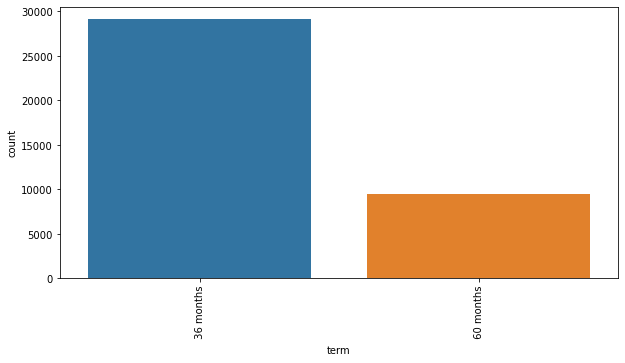

grade


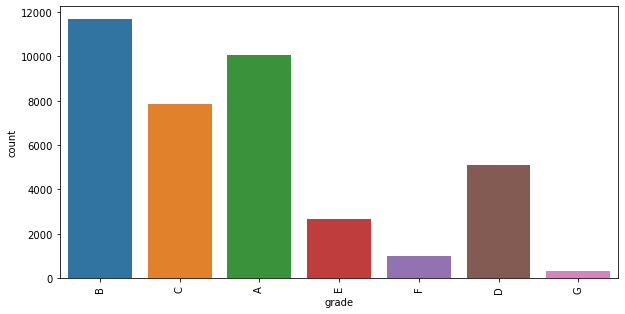

sub_grade


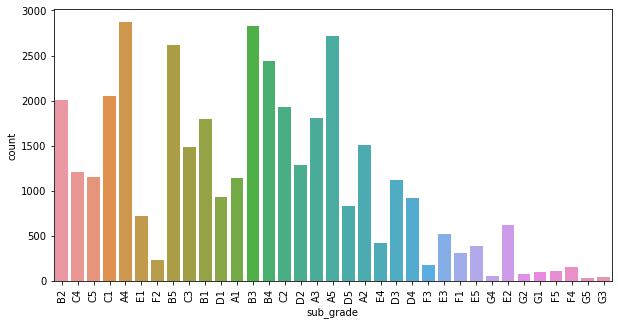

emp_length


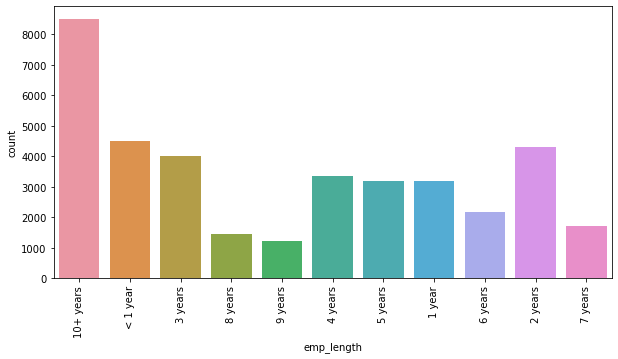

emp_length_std_derived


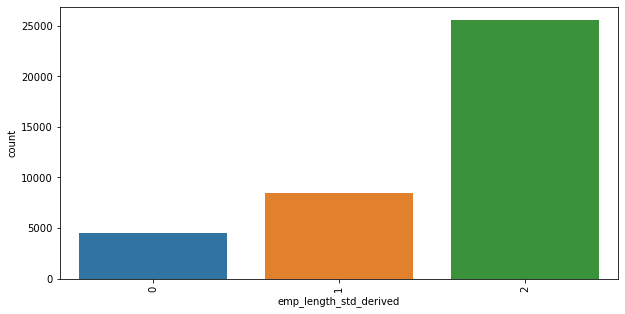

home_ownership


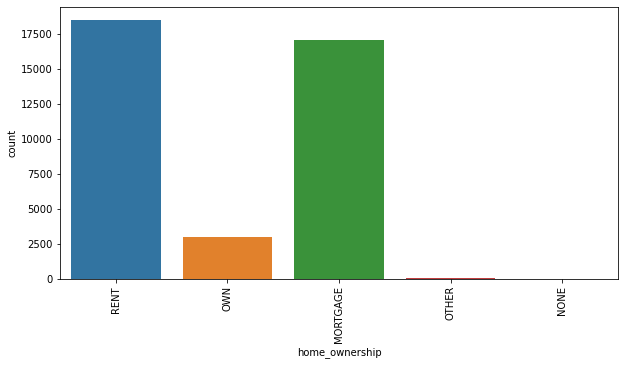

verification_status


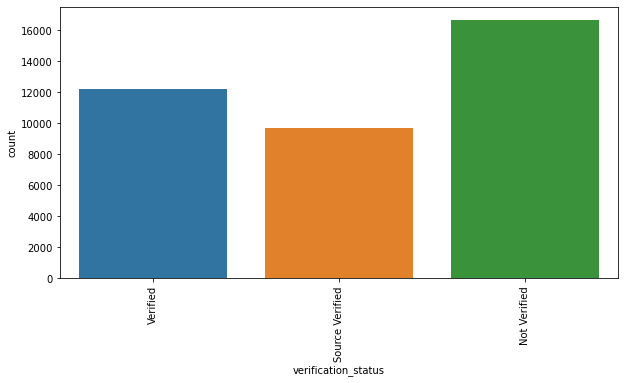

issue_d_month


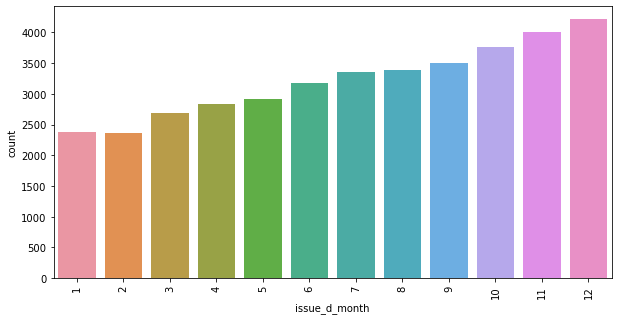

issue_d_year


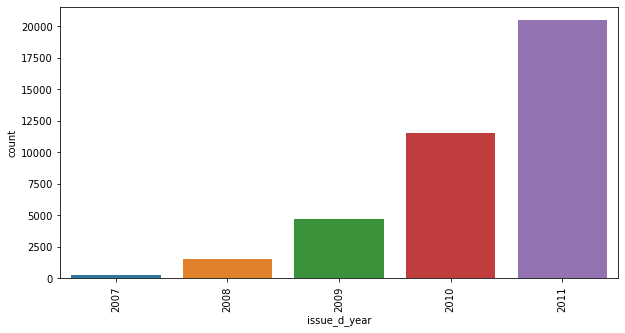

loan_status


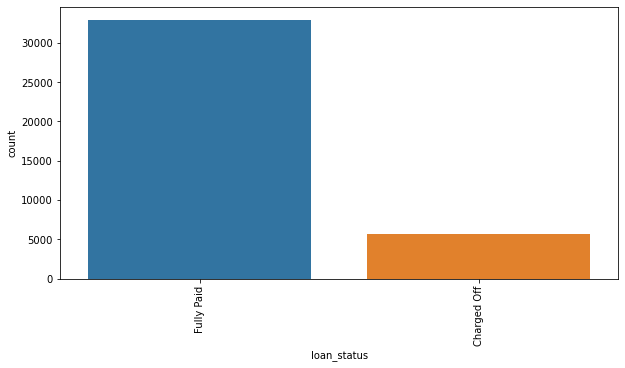

addr_state


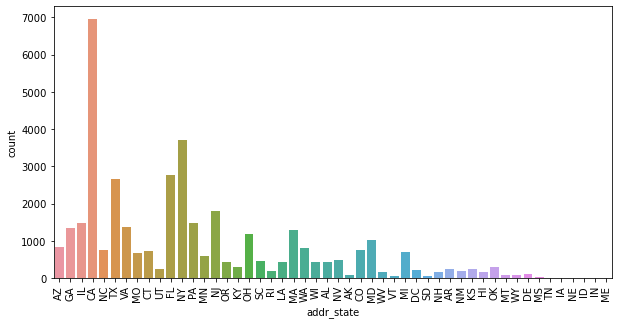

pub_rec_bankruptcies


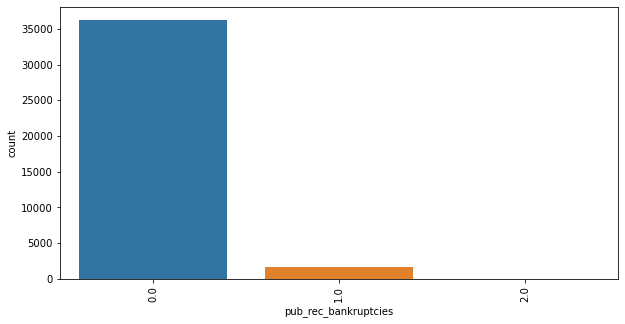

In [201]:
for i in cat_cols:
    print(i)
    plt.figure(figsize=([10,5]))
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

loan_amnt


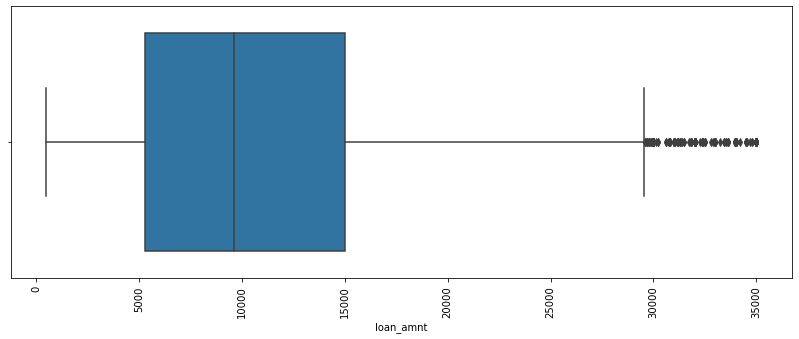

funded_amnt


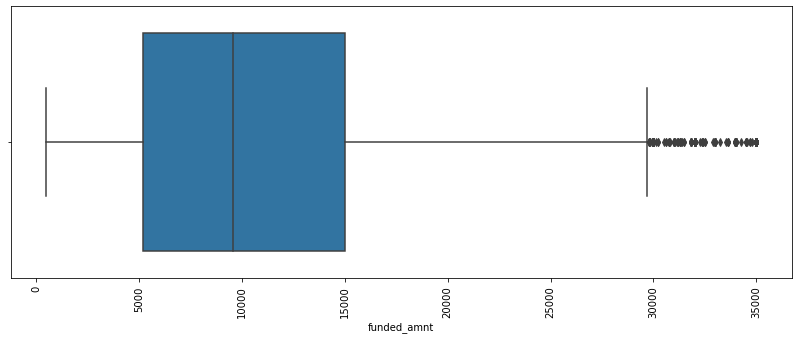

funded_amnt_inv


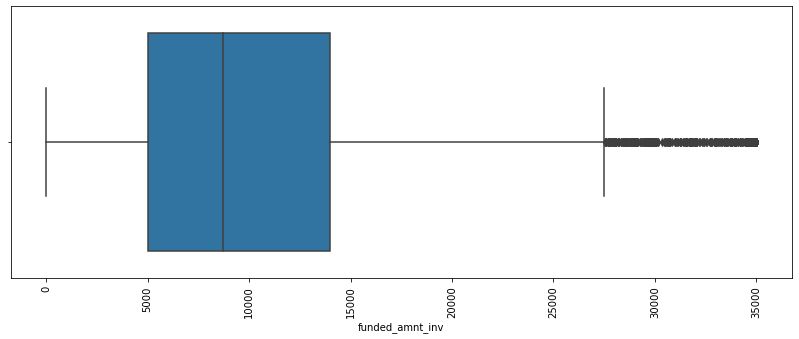

int_rate


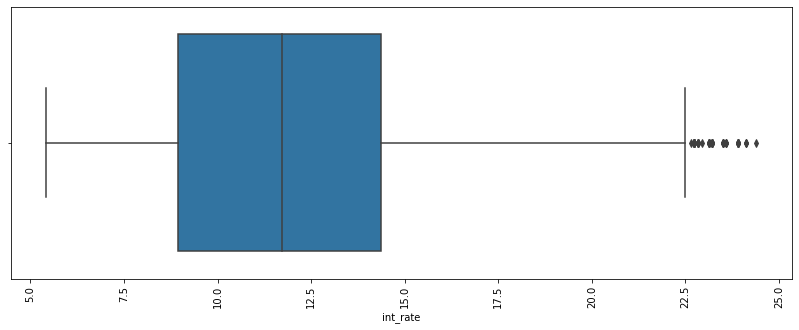

installment


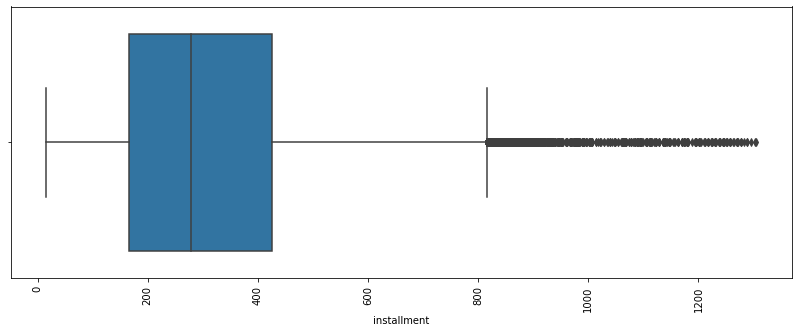

annual_inc


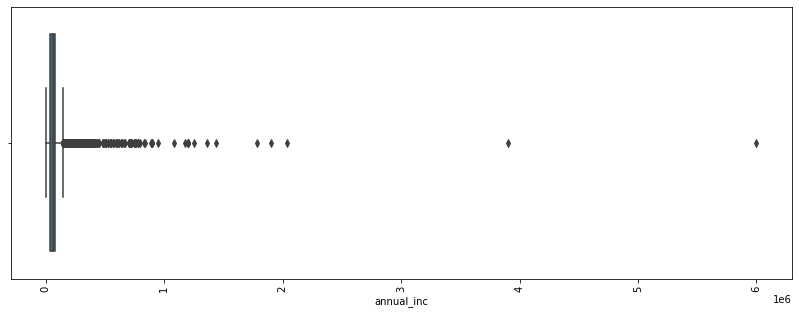

dti


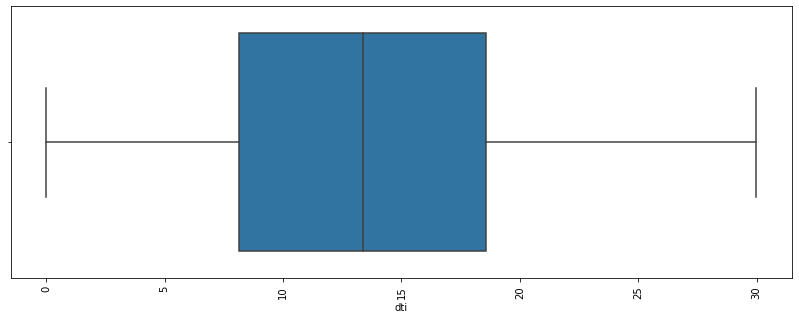

In [203]:
for i in cont_cols:
    print(i)
    plt.figure(figsize=([14,5]))
    sns.boxplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

(1202, 30)


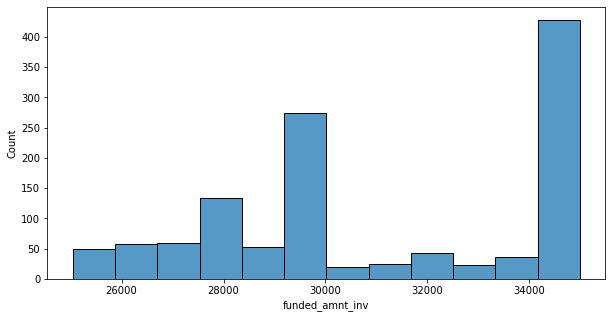

In [211]:
df_1= df[df.funded_amnt_inv > 25000]
print(df_1.shape)
plt.figure(figsize=([10,5]))
sns.histplot(df_1.funded_amnt_inv)
plt.show()

,id,member_id,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,mths_since_last_delinq,pub_rec_bankruptcies,issue_d_year,issue_d_month,term_mon,emp_length_std_derived
loan_amnt,,,,,,,,,,,,,,
500,229475.400000,2.207636e+05,500.000000,465.000000,10.082000,16.160000,26080.808000,9.468000,11.5,0.000000,2007.8,3.400000,36.000000,0.800000
700,306018.000000,3.057200e+05,700.000000,700.000000,12.290000,23.350000,19000.000000,12.380000,NaN,0.000000,2008.0,3.000000,36.000000,0.000000
725,311591.000000,3.115710e+05,725.000000,650.000000,7.370000,22.510000,12000.000000,3.600000,NaN,0.000000,2008.0,3.000000,36.000000,2.000000
750,253227.000000,2.532230e+05,750.000000,725.000000,12.290000,25.020000,19000.000000,24.000000,0.0,NaN,2008.0,2.000000,36.000000,0.000000
800,244029.000000,2.440140e+05,800.000000,800.000000,7.370000,24.840000,35000.000000,7.650000,0.0,NaN,2008.0,1.000000,36.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34475,928228.000000,1.146543e+06,32860.000000,32572.709816,14.928000,777.028000,72396.752000,20.128000,29.0,0.000000,2011.0,9.200000,60.000000,1.400000
34525,969370.000000,1.190577e+06,34525.000000,34275.000000,14.270000,808.180000,112000.000000,17.660000,NaN,0.000000,2011.0,10.000000,60.000000,1.000000
34675,881731.000000,1.096812e+06,34675.000000,34650.000000,13.490000,797.690000,120000.000000,17.720000,NaN,0.000000,2011.0,10.000000,60.000000,2.000000


loan_amnt


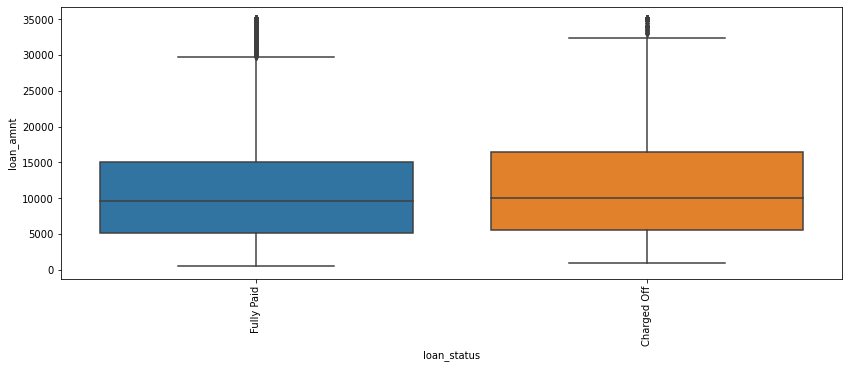

funded_amnt


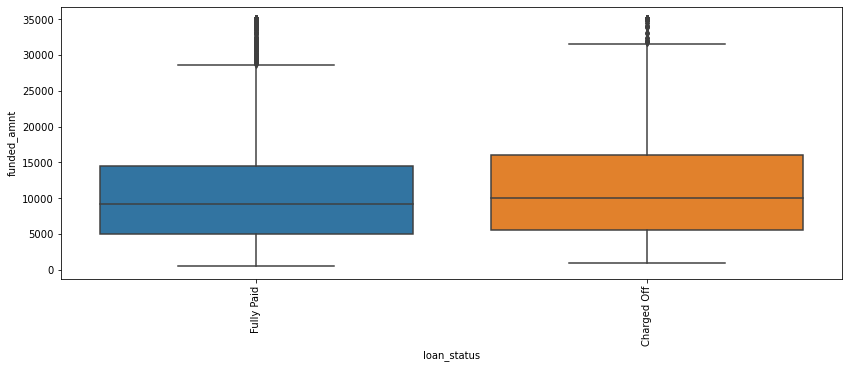

funded_amnt_inv


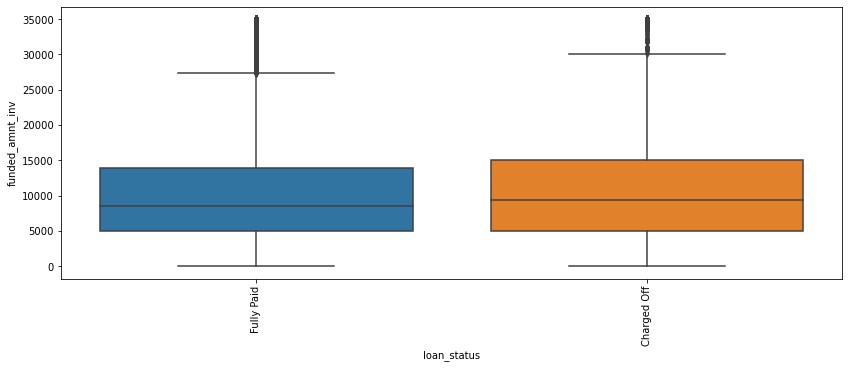

int_rate


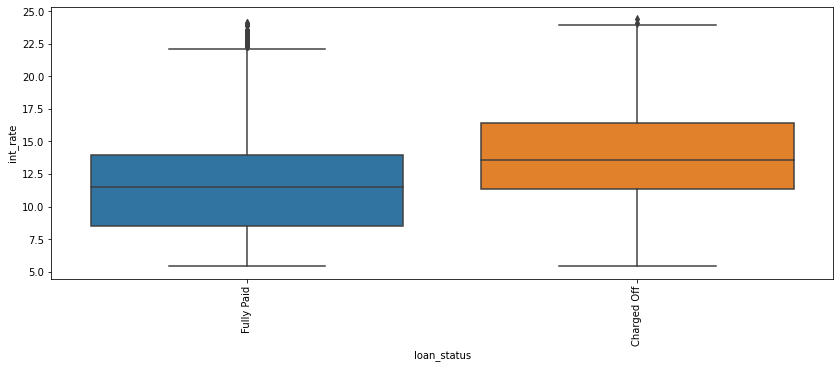

installment


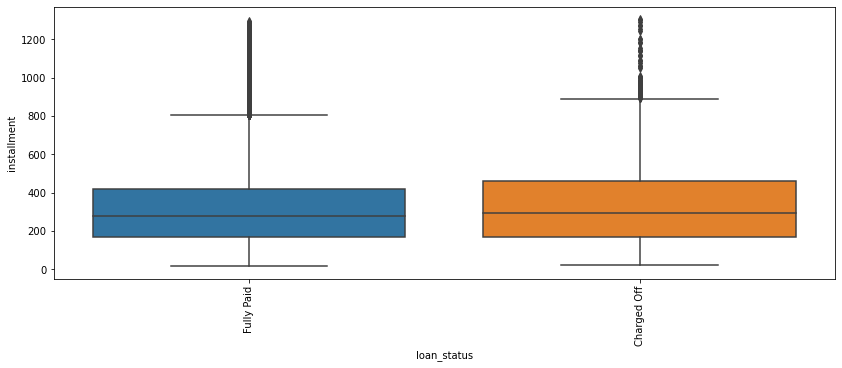

annual_inc


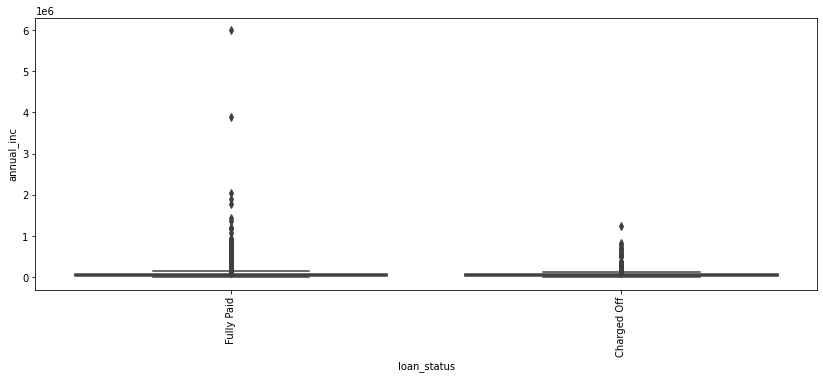

dti


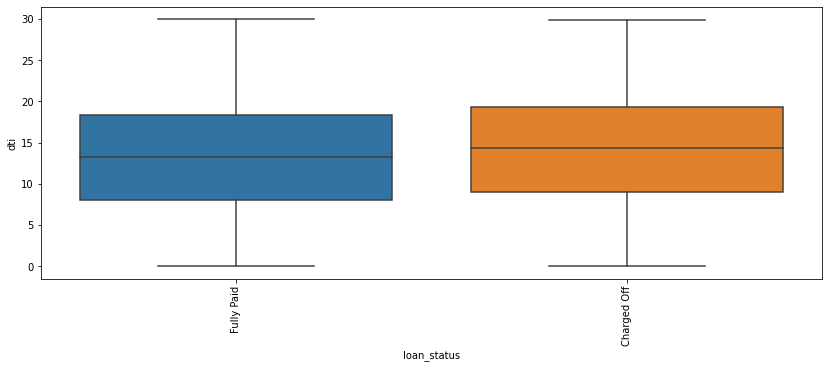

In [216]:
for i in cont_cols:
    print(i)
    plt.figure(figsize=([14,5]))
    sns.boxplot(data= df, x='loan_status',y=i)
    plt.xticks(rotation=90)
    plt.show()

loan_amnt


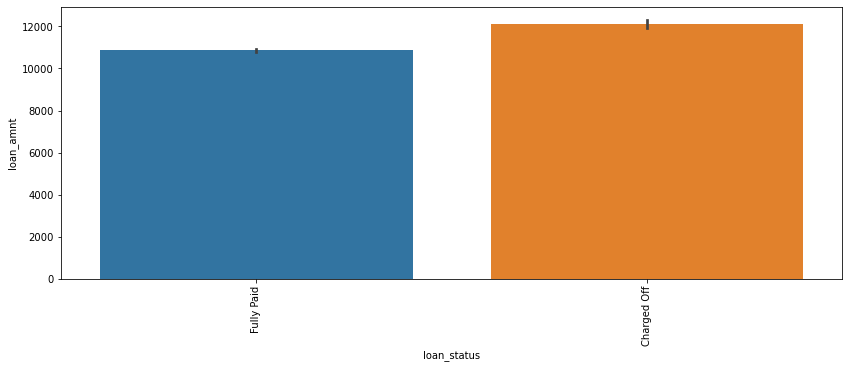

funded_amnt


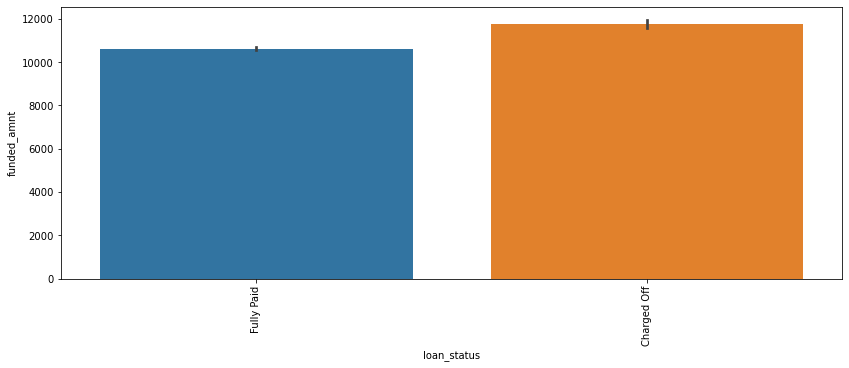

funded_amnt_inv


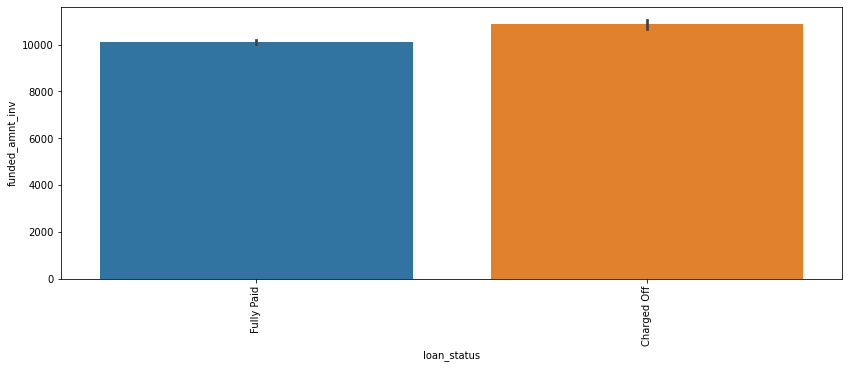

int_rate


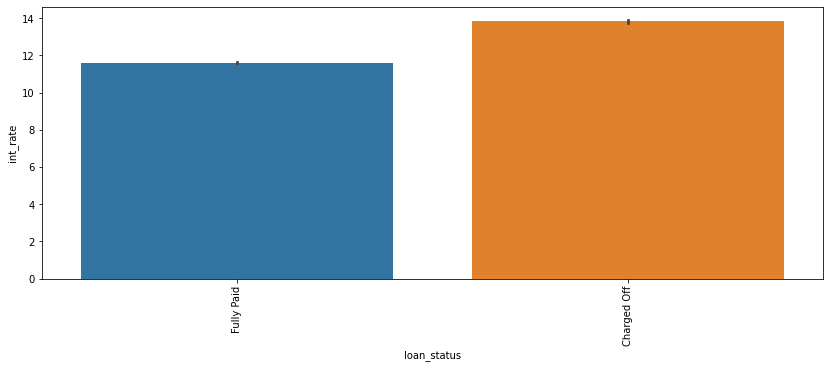

installment


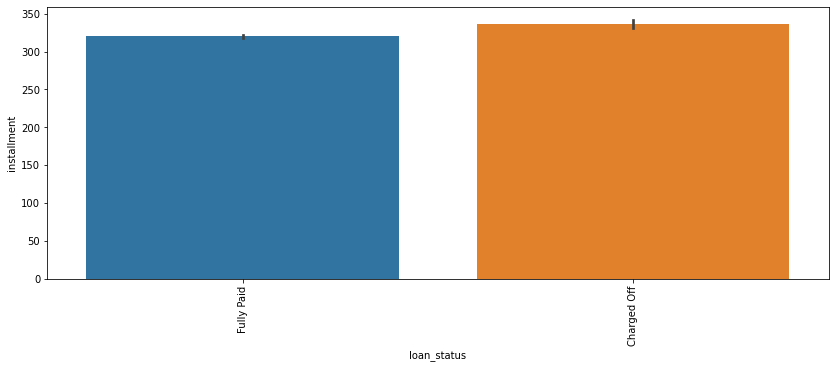

annual_inc


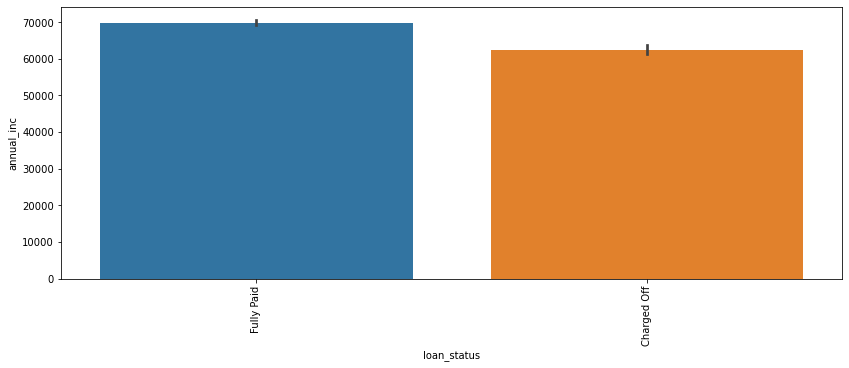

dti


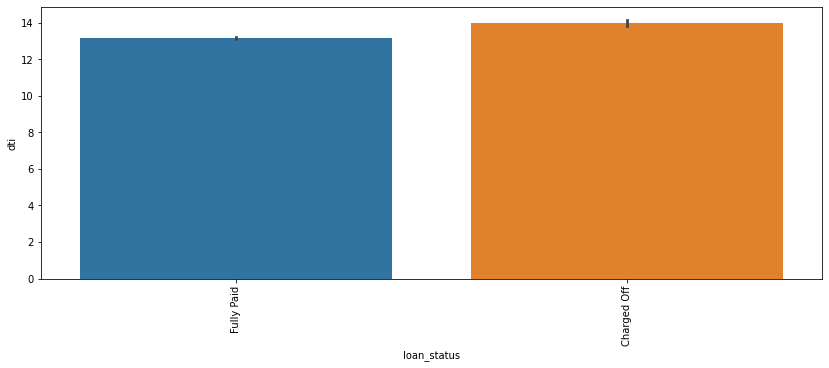

In [217]:
for i in cont_cols:
    print(i)
    plt.figure(figsize=([14,5]))
    sns.barplot(data= df, x='loan_status',y=i)
    plt.xticks(rotation=90)
    plt.show()

term


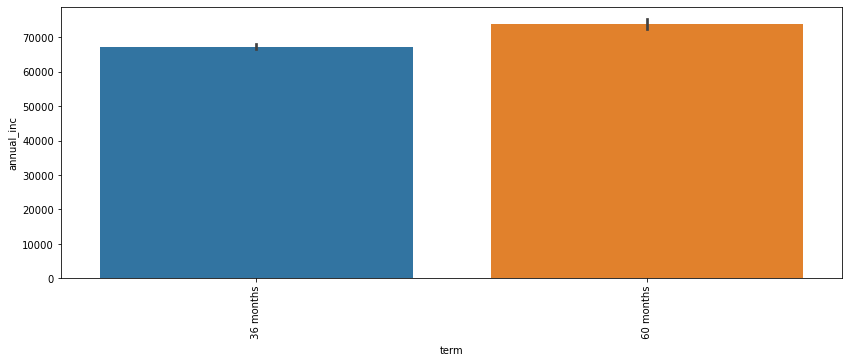

grade


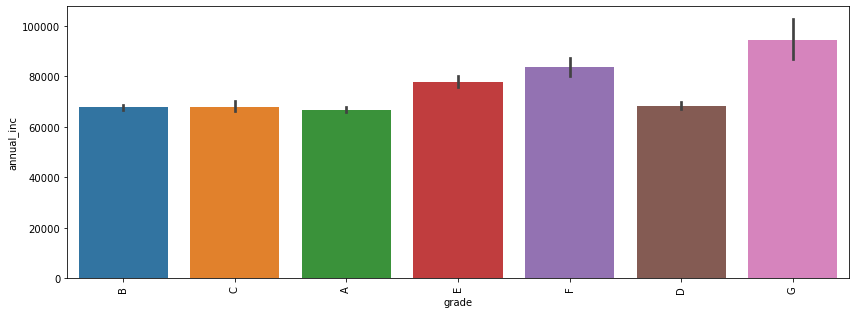

sub_grade


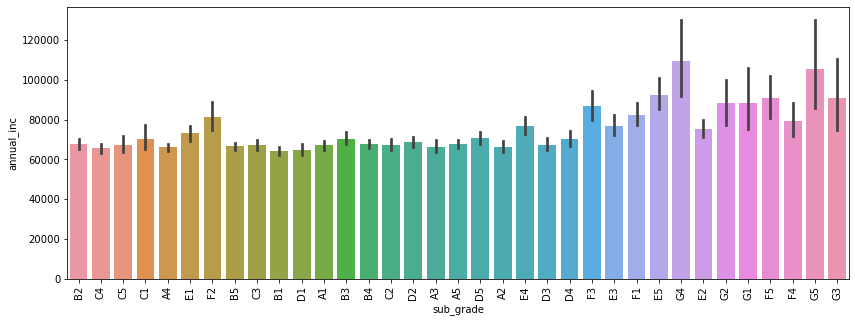

emp_length


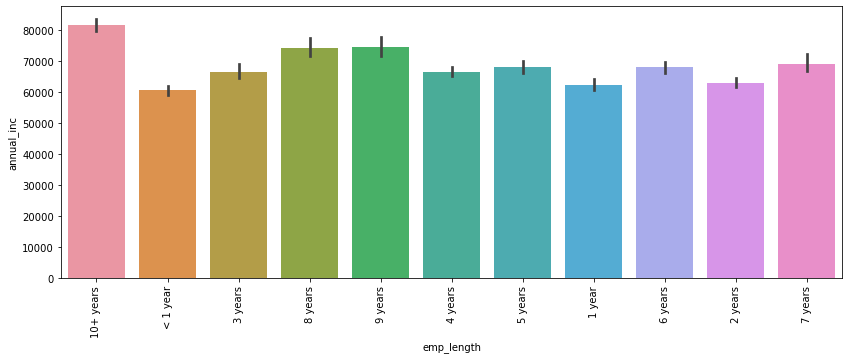

emp_length_std_derived


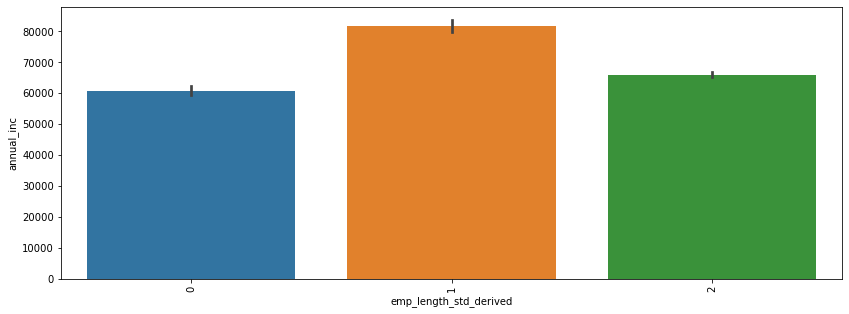

home_ownership


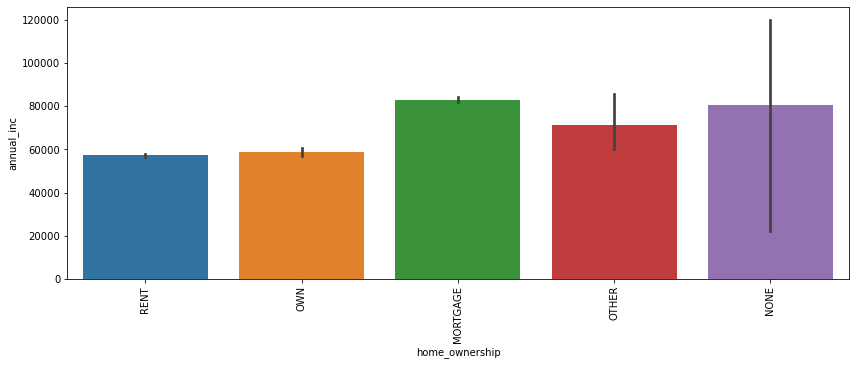

verification_status


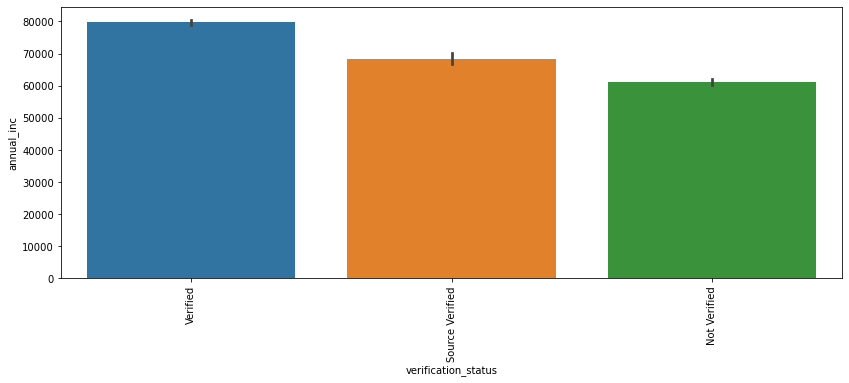

issue_d_month


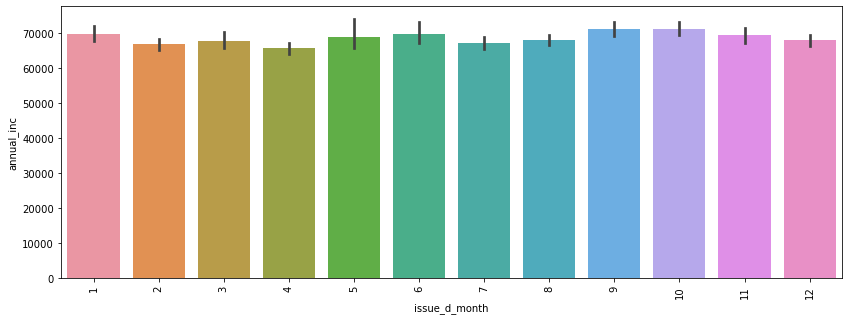

issue_d_year


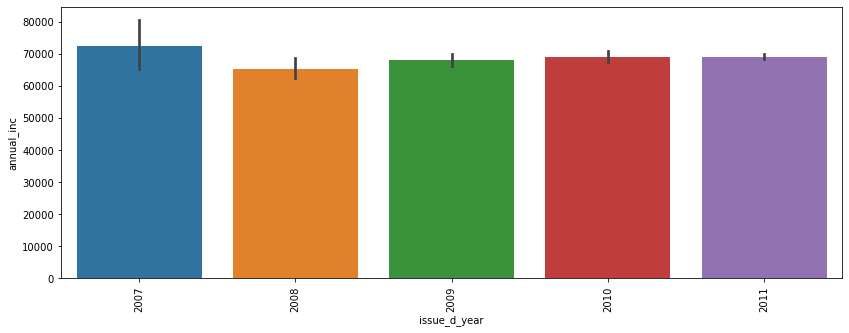

loan_status


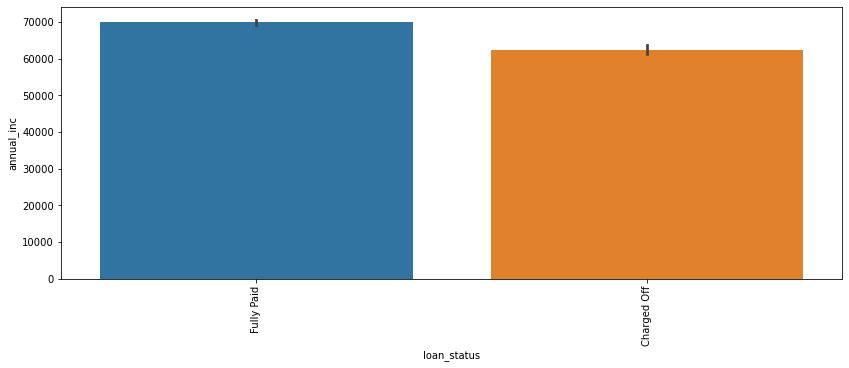

addr_state


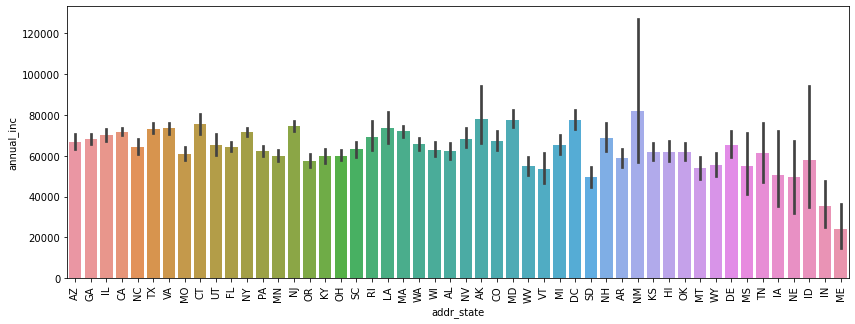

pub_rec_bankruptcies


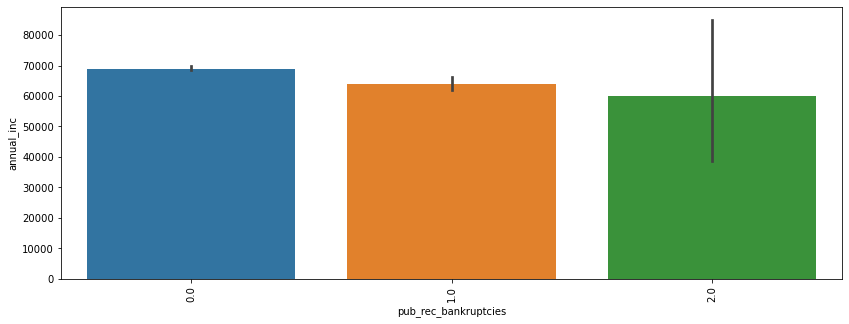

In [218]:
for i in cat_cols:
    print(i)
    plt.figure(figsize=([14,5]))
    sns.barplot(data= df, x=i,y='annual_inc')
    plt.xticks(rotation=90)
    plt.show()